In [1]:
# Load all methods
%run 10_a_preprocess_non_interactive.ipynb

In [2]:
# Write status to log file without date time stampe
path = output_path
msg = 'Import libraries completed'
file_name = '2_model_random_forest_results_'+'.log'
log_to_file(path,msg,file_name)

In [3]:
# Define data and target
df =  'df_processed_final.csv'    #'fd.csv' 
target ='Survived'  # 'fd_taken' 
path = output_path_csvs

# Load data
df = read_file(df,path) 

In [4]:
# test point
df.head(2)

Survived  Pclass   Age  SibSp  Parch       Fare  Embarked_Q  Embarked_S  \
0         0     3.0  22.0    0.0    0.0  31.815983           0           1   
1         1     3.0  22.0    0.0    0.0  31.815983           0           1   

   Sex_male  
0         1  
1         1

In [5]:
threshold=0.545
df,to_drop = drop_correlated_columns(df,threshold)

In [6]:
# test point
df.head()

Survived  Pclass   Age  SibSp  Parch  Embarked_Q  Embarked_S  Sex_male
0         0     3.0  22.0    0.0    0.0           0           1         1
1         1     3.0  22.0    0.0    0.0           0           1         1
2         0     3.0  35.0    0.0    0.0           0           1         1
3         0     3.0  22.0    0.0    0.0           1           0         1
4         0     1.0  54.0    0.0    0.0           0           1         1

inside split target:
 Survived
 
 Data Set shape is: 
 492 7
1. feature 1 Age (0.421498)
2. feature 6 Sex_male (0.273487)
3. feature 0 Pclass (0.130836)
4. feature 2 SibSp (0.076855)
5. feature 3 Parch (0.054313)
6. feature 5 Embarked_S (0.031631)
7. feature 4 Embarked_Q (0.011380)


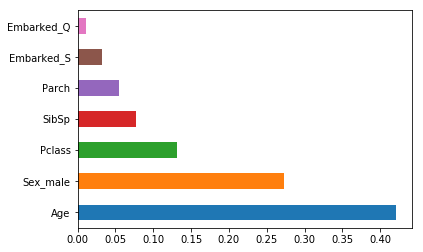

In [7]:
# Split data into train and test
test_size=0.20
random_state=100
X_train,X_test,y_train,y_test,X,y = split(target,df,test_size,random_state)

# Train the model
algo ='RF'   #'SV'    # 2 'LR'  #1 'RF' # 'SV'  #'NB'  #'LR' # 'RF'
X_train,y_train,model = train_model(X_train,X_test,y_train,y_test,X,y,algo,df)

if(algo == 'RF'):    
    feature_importance(X,model)


In [8]:
# Save model
save_model(models_path,model,algo)

if(algo == 'SV'):
    # Predict the results
    pred,conf_matrix,clas_report,acc_score= predict_results(model,X_test,y_test)
else:
    # Predict the results
    print('came inside else:\n')
    pred,pred_proba,conf_matrix,clas_report,acc_score= predict_results(model,X_test,y_test)
    
# Confusion Matrix
print('Confusion Matrix : \n ',conf_matrix)

# Classification Report
print(' \n Classification Report : \n ',clas_report)

# Accuracy
print(' \n Accuracy : \n ',acc_score*100)


came inside else:

Confusion Matrix : 
  [[47  7]
 [22 23]]
 
 Classification Report : 
               precision    recall  f1-score   support

          0       0.68      0.87      0.76        54
          1       0.77      0.51      0.61        45

avg / total       0.72      0.71      0.70        99

 
 Accuracy : 
  70.70707070707071


In [9]:
roc_curve_plot(y_test,pred)

<module 'matplotlib.pyplot' from 'C:\\Users\\sunitha G\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [10]:
# # working one
# def decile_analysis(qq,algo):
#     print(' inside call df_decile: \n',qq,qq.shape)
    
#     base_response_rate = np.round(100*qq[qq.y_true==1].shape[0]/qq.shape[0],decimals=2)
#     print('base_response_rate : \n',base_response_rate)
#     qq.sort_values(by='y_prob',inplace = True,ascending = False)
#     qq.reset_index(inplace = True)
#     print(' after reset index df_decile: \n',qq,qq.shape)
# #     if(algo != 'SV'):
# #         qq.sort_values(by='y_prob',inplace = True,ascending = False)
# #         qq.reset_index(inplace = True)
# #         print(' after reset index df_decile: \n',qq,qq.shape)
#     qq['decile'] = np.nan
#     d =int(np.ceil(qq.shape[0]/10))
#     start = 0
#     end = d
#     for i in range(10):
#         qq.loc[start:end,['decile']] = i+1
#         start = start +d
#         end = end +d
#         qq = pd.crosstab(qq['decile'],qq['y_true'])
#         print('qq after cross tab:\n',qq)
#         qq.columns = ['zero','one']
#         print('qq: \n',qq)       
#         print(' before min_prob: \n',qq,qq.shape)
#         qq['min_prob'] = qq.groupby(by=['decile']).min()['y_prob']
#         qq['max_prob'] = qq.groupby(by=['decile']).max()['y_prob']
#         qq['count'] = qq.groupby(by=['decile']).count()['y_prob']
#         qq['gain'] = np.round(100*qq['one']/qq['one'].sum(),decimals=2)
#         qq['cum_gain'] = np.cumsum(qq['gain'])
#         qq['penetration'] = (qq['one']/qq['count'])*100
#         print('final qq: \n',qq) 
#         return qq

In [11]:
# working one
def decile_analysis(df_decile,algo):
    print(' inside call df_decile: \n',df_decile,df_decile.shape)    
    base_response_rate = np.round(100*df_decile[df_decile.y_true==1].shape[0]/df_decile.shape[0],decimals=2)
    print('base_response_rate : \n',base_response_rate)
    df_decile.sort_values(by='y_prob',inplace = True,ascending = False)
    df_decile.reset_index(inplace = True)
    print(' after reset index df_decile: \n',df_decile,df_decile.shape)
#     if(algo != 'SV'):
#         df_decile.sort_values(by='y_prob',inplace = True,ascending = False)
#         df_decile.reset_index(inplace = True)
#         print(' after reset index df_decile: \n',df_decile,df_decile.shape)
    df_decile['decile'] = np.nan
    d =int(np.ceil(df_decile.shape[0]/10))
    start = 0
    end = d
    for i in range(10):
        df_decile.loc[start:end,['decile']] = i+1
        start = start +d
        end = end +d
        qq = pd.crosstab(df_decile['decile'],df_decile['y_true'])
        print('qq after cross tab:\n',qq)
        qq.columns = ['zero','one']
        print('qq: \n',qq)       
        print(' before min_prob: \n',qq,qq.shape)
        qq['min_prob'] = df_decile.groupby(by=['decile']).min()['y_prob']
        qq['max_prob'] = df_decile.groupby(by=['decile']).max()['y_prob']
        qq['count'] = df_decile.groupby(by=['decile']).count()['y_prob']
        qq['gain'] = np.round(100*qq['one']/qq['one'].sum(),decimals=2)
        qq['cum_gain'] = np.cumsum(qq['gain'])
        qq['penetration'] = (qq['one']/qq['count'])*100
        print('final qq: \n',qq) 
        return qq

In [12]:
df_decile = pd.DataFrame()
df_decile['y_true'] = y_test
df_decile['y_prob'] = pred_proba
df_decile['y_pred'] = pred
df_decile['decile'] = pd.cut(df_decile['y_prob'],10,labels=range(10,0,-1))
# if(algo != 'SV'):
#     df_decile['y_prob'] = pred_proba
#     df_decile['decile'] = pd.cut(df_decile['y_prob'],10,labels=range(10,0,-1))


In [13]:
df_decile.head()

y_true    y_prob  y_pred decile
184       1  0.330000       0      7
252       1  0.947500       1      1
397       1  0.113333       0      9
325       1  1.000000       1      1
136       1  0.335310       0      7

In [14]:
algo

'RF'

In [15]:
print(' before call df_decile: \n',df_decile.head(10),df_decile.shape)

 before call df_decile: 
      y_true    y_prob  y_pred decile
184       1  0.330000       0      7
252       1  0.947500       1      1
397       1  0.113333       0      9
325       1  1.000000       1      1
136       1  0.335310       0      7
103       1  0.000000       0     10
140       0  0.120000       0      9
464       0  0.177174       0      9
460       1  0.230000       0      8
337       0  0.000000       0     10 (99, 4)


In [16]:
print(' before call df_decile: \n',df_decile.tail(10),df_decile.shape)

 before call df_decile: 
      y_true    y_prob  y_pred decile
56        0  0.135833       0      9
395       0  0.012500       0     10
429       0  0.282500       0      8
315       1  0.550000       1      5
55        0  0.118000       0      9
455       1  0.307008       0      7
384       0  0.028286       0     10
18        0  0.500000       0      6
445       1  0.056667       0     10
61        0  0.680000       1      4 (99, 4)


decile_analysis(df_decile,algo)

In [17]:
decile_analysis(df_decile,algo)

 inside call df_decile: 
      y_true    y_prob  y_pred decile
184       1  0.330000       0      7
252       1  0.947500       1      1
397       1  0.113333       0      9
325       1  1.000000       1      1
136       1  0.335310       0      7
103       1  0.000000       0     10
140       0  0.120000       0      9
464       0  0.177174       0      9
460       1  0.230000       0      8
337       0  0.000000       0     10
351       1  0.932500       1      1
279       0  0.285167       0      8
352       1  0.638780       1      4
29        0  0.157500       0      9
487       0  0.346333       0      7
54        1  0.050000       0     10
219       0  0.500500       1      5
199       0  0.318667       0      7
272       1  0.090000       0     10
423       1  0.910000       1      1
407       0  0.990000       1      1
244       0  0.377327       0      7
320       0  0.028286       0     10
98        0  0.153500       0      9
408       0  0.000000       0     10
349       0 

zero  one  min_prob  max_prob  count   gain  cum_gain  penetration
decile                                                                    
1.0        2    9      0.94       1.0     11  100.0     100.0    81.818182